In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import tensorflow as tf

In [7]:
# !pip install tensorflow

In [ ]:
df = pd.read_excel('../data/Concrete_Data.xls')
df.head()

In [ ]:
df.columns = ['cement','furnace','ash','water','superplasticizer','coarse','fine','age','strength']

In [ ]:
df.info()

In [7]:
df.head()

,cement,furnace,ash,water,superplasticizer,coarse,fine,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [8]:
# strength를 예측하는 neural network model을 만들고 평가하시오..

In [10]:
y = df.strength
x = df.loc[:, :'age']

In [11]:
y  # regression

0       79.986111
1       61.887366
2       40.269535
3       41.052780
4       44.296075
          ...    
1025    44.284354
1026    31.178794
1027    23.696601
1028    32.768036
1029    32.401235
Name: strength, Length: 1030, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=111)

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x_train)
x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)

In [14]:
x_train.shape

(824, 8)

In [14]:
# 회귀분석의 경우 마지막 activation 을 사용하지 않는다

model = Sequential()
model.add(Dense(256, input_dim=8, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(56, activation='relu'))
model.add(Dense(28, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2304      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 56)                7224      
                                                                 
 dense_3 (Dense)             (None, 28)                1596      
                                                                 
 dense_4 (Dense)             (None, 1)                 29        
                                                                 
Total params: 44,049
Trainable params: 44,049
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [17]:
hist = model.fit(x_train_sc, y_train, epochs=100, batch_size=10, validation_split=0.2)

Epoch 1/100
66/66 [==============================] - 0s 3ms/step - loss: 863.8524 - val_loss: 253.5287
Epoch 2/100
66/66 [==============================] - 0s 1ms/step - loss: 204.3968 - val_loss: 178.2988
Epoch 3/100
66/66 [==============================] - 0s 2ms/step - loss: 145.9846 - val_loss: 140.6652
Epoch 4/100
66/66 [==============================] - 0s 1ms/step - loss: 126.2157 - val_loss: 133.4973
Epoch 5/100
66/66 [==============================] - 0s 1ms/step - loss: 117.3546 - val_loss: 125.8332
Epoch 6/100
66/66 [==============================] - 0s 1ms/step - loss: 116.6077 - val_loss: 124.9199
Epoch 7/100
66/66 [==============================] - 0s 1ms/step - loss: 108.9657 - val_loss: 111.5492
Epoch 8/100
66/66 [==============================] - 0s 1ms/step - loss: 100.6447 - val_loss: 110.5959
Epoch 9/100
66/66 [==============================] - 0s 1ms/step - loss: 92.6357 - val_loss: 95.2640
Epoch 10/100
66/66 [==============================] - 0s 1ms/step - loss: 8

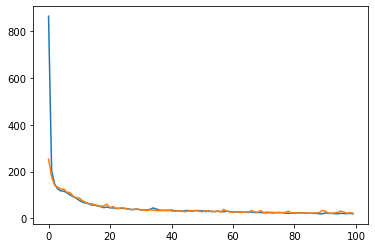

In [24]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [18]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 1977869312.0000


1977869312.0

In [26]:
preds = model.predict(x_test_sc)

In [27]:
preds = [v[0] for v in preds]
preds

[45.368923,
 29.70999,
 31.84686,
 33.701836,
 61.375706,
 33.869713,
 19.271906,
 14.431589,
 23.122871,
 19.345968,
 37.855362,
 32.760098,
 37.845757,
 53.81366,
 41.115845,
 59.511375,
 31.540426,
 25.475939,
 34.919136,
 20.281279,
 19.805513,
 29.130491,
 24.232594,
 24.131506,
 43.57869,
 38.129646,
 20.957235,
 19.961845,
 62.2474,
 46.54567,
 64.51732,
 36.436935,
 46.357742,
 35.602036,
 28.451513,
 42.601955,
 37.038097,
 37.96987,
 42.54087,
 30.35013,
 78.41295,
 43.80167,
 26.789455,
 34.310493,
 42.548042,
 30.215372,
 41.126312,
 14.034615,
 32.149864,
 23.570326,
 43.05079,
 62.535057,
 34.832466,
 36.932266,
 43.655083,
 47.540222,
 46.57078,
 40.16523,
 32.665092,
 30.303907,
 37.793972,
 12.796452,
 51.086784,
 31.077673,
 76.41998,
 26.076525,
 16.583643,
 49.870773,
 55.517883,
 76.31974,
 41.937717,
 45.99546,
 42.86609,
 37.411324,
 44.911186,
 25.06669,
 12.865903,
 63.262688,
 59.2107,
 56.156826,
 54.111507,
 38.521385,
 35.20486,
 43.45697,
 41.49909,
 74.21

In [28]:
from sklearn.metrics import r2_score
r2_score(y_test, preds)

0.8791392568935923

In [29]:
for i in zip(y_test, preds):
    print(i)

(47.739318239999996, 45.368923)
(30.44726016, 29.70999)
(42.29245784, 31.84686)
(32.922478999999996, 33.701836)
(65.909079268, 61.375706)
(26.22766704, 33.869713)
(20.96696516, 19.271906)
(10.53519328, 14.431589)
(23.221551679999997, 23.122871)
(13.395533715270679, 19.345968)
(33.05347944, 37.855362)
(42.79577532, 32.760098)
(36.44570136, 37.845757)
(52.82075636, 53.81366)
(37.34202016, 41.115845)
(62.935369279999996, 59.511375)
(33.72916592, 31.540426)
(29.7508894, 25.475939)
(24.40055564, 34.919136)
(24.44881896, 20.281279)
(20.08443588, 19.805513)
(32.039949719999996, 29.130491)
(18.287661424, 24.232594)
(34.23937816, 24.131506)
(49.20100736, 43.57869)
(50.60064364, 38.129646)
(21.917063088, 20.957235)
(15.091250688, 19.961845)
(64.30053176, 62.2474)
(41.934619796, 46.54567)
(68.29949256, 64.51732)
(39.056057496, 36.436935)
(44.38846488, 46.357742)
(33.398217439999996, 35.602036)
(30.2335226, 28.451513)
(34.73580088, 42.601955)
(33.5430074, 37.038097)
(39.45181672, 37.96987)
(48.846